## **Lecture 7. EigenValues and Eigenvectors:** 

### **7.1 Eigenvalues and Eigenvectors Problem Statement**

#### <font color="cyan">**Eigenvalues and eigenvectors**</font> 

We learned from last chapter that matrix $A$ apply to column vector $x$, that is $Ax$, is a linear transformation of $x$. There is a special transform in the following form: 

$$Ax = \lambda{x}$$

Where $A$ is $n\times{n}$ matrix, $x$ is $n\times{1}$ column vector ($x\neq{0}$), and $\lambda$ is some scalar. 

Any $\lambda$ that satisfies the above equation is known as an **eigenvalue** of the matrix $A$, while the associated vector $x$ is called an **eigenvector** corresponding to $\lambda$. 


<font color="magenta">**TRY IT!** </font> Plot the vector $x$ = [[1], [1]] and the vector $b = Ax$, where $A$ = [[2, 0], [0, 1]]

In [1]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def plot_vect(x, b, xlim, ylim):
    """
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    """
    plt.figure(figsize = (6, 6))
    plt.quiver(0, 0, x[0], x[1], color='k', angles='xy', scale_units='xy', scale=1, label = 'Original vector')
    plt.quiver(0, 0, b[0], b[1], color='g', angles='xy', scale_units='xy', scale=1, label = 'Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

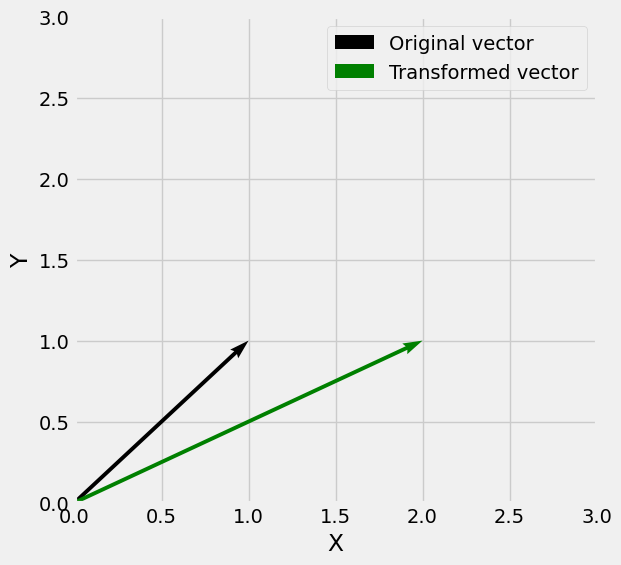

[2 1]


In [4]:
"""
Example 7.1.1: Eigenvealues and Eigenvectors
Eigenvealues      2,      1
Eigenvectors [1, 0], [0, 1]
As iteration increases, the transformed vector will approach to largest eigenvectors
"""
# iteraion 1
A = np.array([[2, 0],[0, 1]])
x_0 = np.array([1, 1])               # initial condition
x_1 = np.dot(A, x_0)

plot_vect(x_0, x_1, (0, 3), (0, 3))
print(x_1)

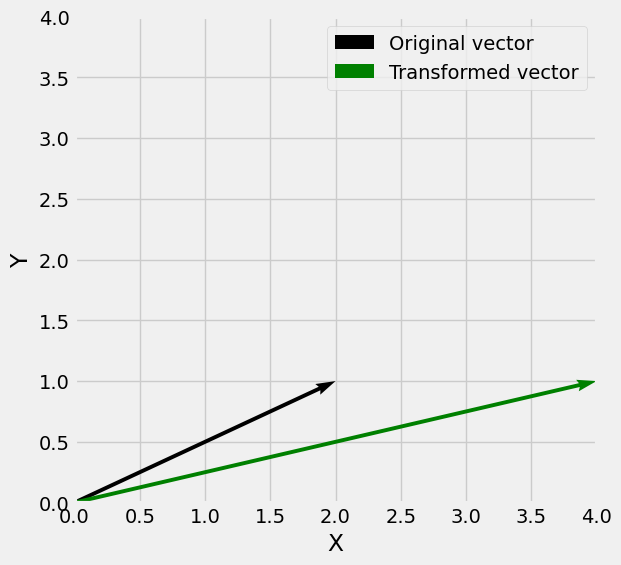

[4 1]


In [5]:
# iteraion 2, more approaching to the [1, 0] direction
A = np.array([[2, 0],[0, 1]])
x_2 = np.dot(A, x_1)

plot_vect(x_1, x_2, (0, 4), (0, 4))
print(x_2)

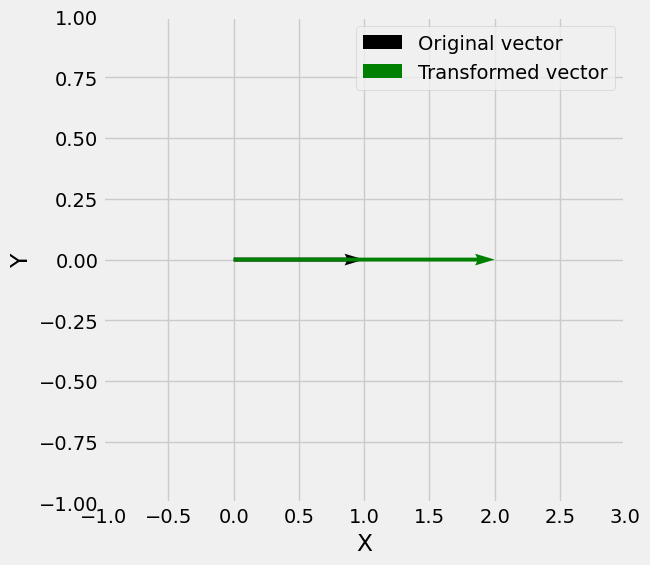

In [6]:
# change initial conidtion x_0
# faster convergence while x_0 projected onto one eigenvector
x_0 = np.array([1, 0])
x_1 = np.dot(A, x_0)

plot_vect(x_0, x_1, (-1, 3), (-1, 1))

$$ Ax = 2x$$


</br>

The direction of the vector doesn't change at all (no rotation). 
You can also try that `[0, 1]` is another eigenvector, try to verify by yourself. 

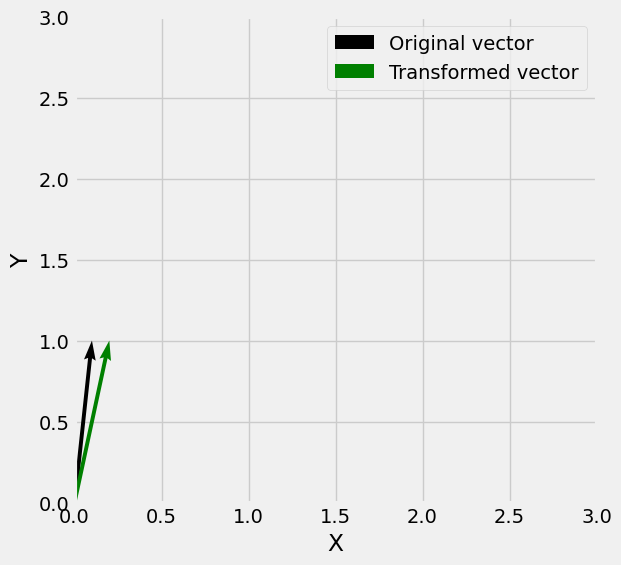

[0.2 1. ]


In [17]:
# change initial conidtion x_0
# slower convergence while x_0 projected onto the other eigenvector (with smaller eigenvalue)

A = np.array([[2, 0],[0, 1]])
x_0 = np.array([0.1, 1])       # along y-axis (smaller eigenvalue)
x_1 = np.dot(A, x_0)

plot_vect(x_0, x_1, (0, 3), (0, 3))
print(x_1)

# only find the maximum eigenvalue and corresponding eigenvector 


#### <font color="cyan">**The Characteristic Equation**</font>

In order to get the eigenvalues and eigenvectors, from $Ax=\lambda{x}$, we can get the following form:

$$(A-\lambda{I})x=0$$

Where $I$ is the identify matrix with the same dimensions as $A$. If matrix $A-\lambda{I}$ has an inverse, then multiply both sides with $(A-\lambda{I})^{-1}$, we get a trivial solution $x=0$. Therefore, when $A-\lambda{I}$ is singular (no inverse exist), we have a nontrivial solution, which means that the determinant is zero:

$$det(A-\lambda{I})=0$$

this equation is called **characteristic equation**, which will lead to a polynomial equation for $\lambda$, then we can solve for the eigenvalues. Let's look at one example. 

<font color="magenta">**TRY IT!**</font> Get the eigenvalues for matrix [[0, 2], [2, 3]]

The characteristic equation gives us 

$$
\begin{vmatrix}
0-\lambda & 2 \\ 
2 & 3-\lambda
\end{vmatrix}
=0
$$

Therefore, we have 

$$-\lambda(3-\lambda)-4 = 0 \Rightarrow \lambda^2-3\lambda-4=0$$

We get two eigenvalues:

$$\lambda_1 = 4, \lambda_2 = -1$$

**TRY IT!** Get the eigenvectors for the above two eigenvalues. 

Let's get the first eigenvector when $\lambda_1 = 4$, we can simply insert it back to $A-\lambda{I}=0$, where we have:

$$
\begin{bmatrix}
-4 & 2 \\
2 & -1 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\
\end{bmatrix}
=\begin{bmatrix}
0\\0\\
\end{bmatrix}
$$

Therefore, we have two equations $-4x_1+2x_2=0$ and $2x_1-x_2=0$, both of them indicate that $x_2=2x_1$. Therefore, we can have the first eigenvector as 

$$x_1 = k_1\begin{bmatrix}
1\\2\\
\end{bmatrix}$$

$k_1$ is a scalar vector ($k_1 \neq 0$), as long as we have the ratio between $x_2$ and $x_1$ as 2, it will be an eigenvector. We can verify the vector [[1], [2]] is an eigenvector by inserting it back:

$$
\begin{bmatrix}
0 & 2 \\
2 & 3 \\
\end{bmatrix}
\begin{bmatrix}
1\\2\\
\end{bmatrix}
=\begin{bmatrix}
4\\8\\
\end{bmatrix}
=4\begin{bmatrix}
1\\2\\
\end{bmatrix}
$$

By inserting $\lambda_2=-1$ similarly as above, we can get the other eigenvector as the following, where $k_2 \neq 0$:
$$x_2 = k_2\begin{bmatrix}
-2\\1\\
\end{bmatrix}$$

From the above example, we can see how can we get the eigenvalues and eigenvectors from a matrix $A$, and the chosen of the eigenvectors for a system is not unique. But things will become really complicated when you have a larger matrix $A$ when you try to solve the $n^{th}$ order polynomial characteristic equation. 

Luckily, there are many different numerical methods have been developed to solve the eigenvalue problems for larger matrices. 

We will introduce <font color="cyan">(1) Power method</font> and <font color="cyan">(2) QR method </font>in the next two sections. 

#### <font color=red>**Homework**</font> 

1. Refer to Example code 7.1.1 and 7.2.2, apply fixed iteration number and monitoring the change of x_i. <font color="cyan">(It will be plus to "visualize" the change of x_i by `matplotlib.pyplot`)</font>
